In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from subprocess import call
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

# 1) 讀取資料
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [10]:
# 2-1) 檢查空值
print(train.isna().sum())
print('-'*20)
test.isna().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64
--------------------


Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [11]:
# 選用的特徵
features = ['Dates', 'DayOfWeek', 'PdDistrict', 'X', 'Y' ]
# 選用target
label = ['Category']

train_df = train[features].copy()
label_df = train[label].copy()

In [12]:
def preprocess(df):
    # 2-2) one-hot
    df_tmp = pd.get_dummies(df[['DayOfWeek', 'PdDistrict']])
    # 2-3) 抓小時
    df_tmp['Hours'] = pd.to_datetime(df['Dates']).dt.hour
    # 2-4) 處理X, Y (旋轉後normalize)
    df_tmp[['X', 'Y']] = df[['X', 'Y']].copy()   
    scale = preprocessing.StandardScaler()
    df_tmp[['X', 'Y']] = scale.fit_transform(df_tmp[['X', 'Y']])
    
    return df_tmp

# feature的轉換
train_ohe = preprocess(train_df)
# label轉換
le = preprocessing.LabelEncoder()
label_ohe = le.fit_transform(label_df)

C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# 2-5) train/ test split 
X_train, X_test, y_train, y_test = train_test_split(train_ohe, label_ohe, test_size=0.25, random_state=42)

# 3)  DecisionTree
clf = DecisionTreeClassifier(random_state=0, max_depth=15)
# cross_val_score(clf, X_train, y_train, cv=10)

In [14]:
clf.fit(X_train, y_train)
# 4) Precision, Recall, Accuracy
clf_predict = clf.predict(X_test)
report = classification_report(y_test, clf_predict, target_names=le.classes_, output_dict=True)
clf.score(X_test, y_test)

C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2699931211363336

In [15]:
pd.DataFrame.from_dict(classification_report(y_test, clf_predict, target_names=le.classes_, output_dict=True)).T

C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1-score,precision,recall,support
ARSON,0.004739,0.025000,0.002618,382.0
ASSAULT,0.167660,0.180440,0.156570,19231.0
BAD CHECKS,0.000000,0.000000,0.000000,89.0
BRIBERY,0.000000,0.000000,0.000000,72.0
BURGLARY,0.063468,0.143183,0.040770,9247.0
DISORDERLY CONDUCT,0.058209,0.121118,0.038310,1018.0
DRIVING UNDER THE INFLUENCE,0.003195,0.024390,0.001709,585.0
DRUG/NARCOTIC,0.356649,0.315381,0.410344,13457.0
DRUNKENNESS,0.003466,0.025641,0.001859,1076.0
EMBEZZLEMENT,0.006873,0.058824,0.003650,274.0


Text(0, 0.5, 'True')

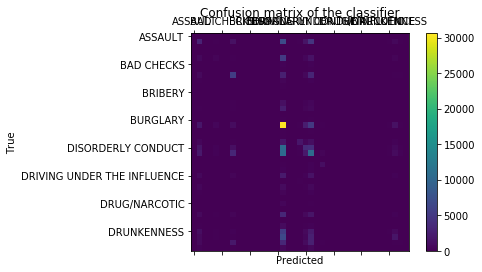

In [16]:
cm = confusion_matrix(y_test, clf_predict)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + le.classes_)
ax.set_yticklabels([''] + le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')

Text(0.5, 1.0, 'Confusion Matrix')

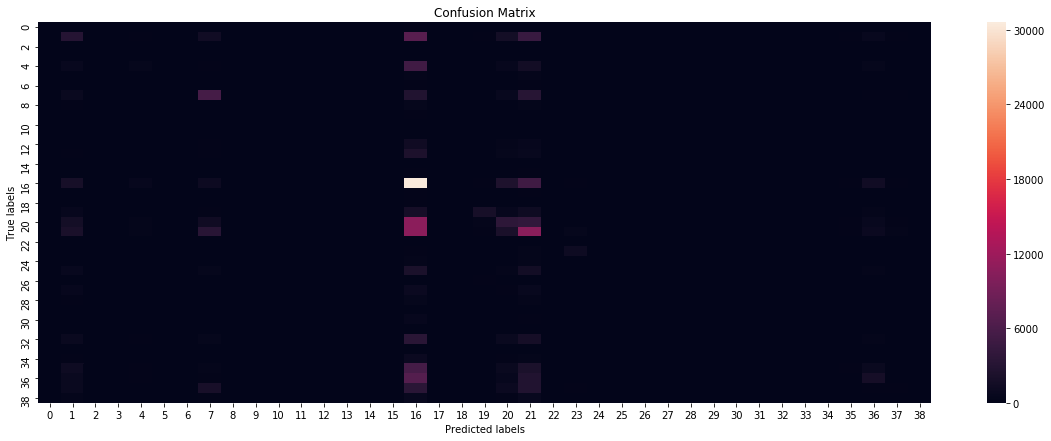

In [17]:
plt.figure(figsize=(20,7))
ax= plt.subplot()
sns.heatmap(cm, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
# ax.xaxis.set_ticklabels([''] + le.classes_)
# ax.yaxis.set_ticklabels([''] + le.classes_)

In [18]:
# 5) 決策樹的圖
tree.export_graphviz(clf, out_file='./DCtree.dot', feature_names = train_ohe.columns, class_names = le.classes_, rounded = True, proportion = False, precision = 2, filled = True) 
# 用 graphviz 畫
os.environ["PATH"] += os.pathsep + 'C:Users/Wade/Anaconda3/Library/bin/graphviz/bin'
# 15層的關係可能要畫個5分鐘
# call(['dot', '-Tpng', 'DCtree.dot', '-o', 'DCtree.png', '-Gdpi=600'])
# 在terminal用
# !dot -Tpng DCtree.dot -o DCtree.png
# 利用pydot轉換
# (graph,) = pydot.graph_from_dot_file('./DCtree.dot')
# graph.write_png('./DCtree.png')